In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model_dir = os.getcwd() + '/Models/'
image_dir = os.getcwd() + '/Images/'
output_dir = os.getcwd() + '/Output/'

In [4]:
portrait_naive_losses = np.genfromtxt(output_dir+"portrait_naive_losses.csv", delimiter=",")
portrait_naive_times = np.genfromtxt(output_dir+"portrait_naive_times.csv", delimiter=",")
portrait_naive_times = np.hstack((np.zeros((10,1)), portrait_naive_times))

portrait_weight_losses = np.genfromtxt(output_dir+"portrait_weight_losses.csv", delimiter=",")
portrait_weight_times = np.genfromtxt(output_dir+"portrait_weight_times.csv", delimiter=",")
portrait_weight_times = np.hstack((np.zeros((10,1)), portrait_weight_times))

portrait_reuse_style_losses = np.genfromtxt(output_dir+"portrait_reuse_style_losses.csv", delimiter=",")
portrait_reuse_style_times = np.genfromtxt(output_dir+"portrait_reuse_style_times.csv", delimiter=",")
portrait_reuse_style_times = np.hstack((np.zeros((10,1)), portrait_reuse_style_times))

portrait_reuse_content_losses = np.genfromtxt(output_dir+"portrait_reuse_content_losses.csv", delimiter=",")
portrait_reuse_content_times = np.genfromtxt(output_dir+"portrait_reuse_content_times.csv", delimiter=",")
portrait_reuse_content_times = np.hstack((np.zeros((10,1)), portrait_reuse_content_times))

portrait_align_losses = np.genfromtxt(output_dir+"portrait_align_losses.csv", delimiter=",")
portrait_align_times = np.genfromtxt(output_dir+"portrait_align_times.csv", delimiter=",")
portrait_align_times = np.hstack((np.zeros((10,1)), portrait_align_times))

portrait_mask_naive_losses = np.genfromtxt(output_dir+"portrait_mask_naive_losses.csv", delimiter=",")
portrait_mask_naive_times = np.genfromtxt(output_dir+"portrait_mask_naive_times.csv", delimiter=",")
portrait_mask_naive_times = np.hstack((np.zeros((9,1)), portrait_mask_naive_times))

portrait_mask_best_losses = np.genfromtxt(output_dir+"portrait_mask_best_losses.csv", delimiter=",")
portrait_mask_best_times = np.genfromtxt(output_dir+"portrait_mask_best_times.csv", delimiter=",")
portrait_mask_best_times = np.hstack((np.zeros((10,1)), portrait_mask_best_times))

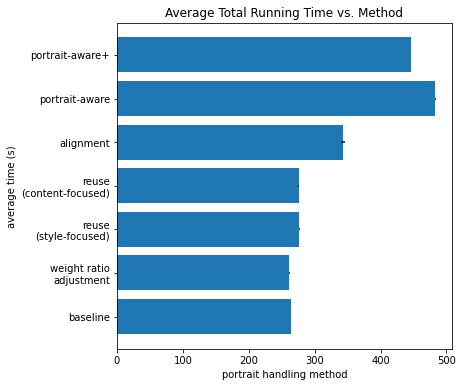

In [5]:
# plot total running time
plt.figure(figsize=[6,6])
plt.barh(y = ["baseline", "weight ratio\nadjustment",
              "reuse\n(style-focused)", "reuse\n(content-focused)", 
              "alignment", "portrait-aware", "portrait-aware+"],
         width = [portrait_naive_times[:,-1].mean(),
                  portrait_weight_times[:,-1].mean(),
                  portrait_reuse_style_times[:,-1].mean(),
                  portrait_reuse_content_times[:,-1].mean(),
                  portrait_align_times[:,-1].mean(),
                  portrait_mask_naive_times[:,-1].mean(),
                  portrait_mask_best_times[:,-1].mean()],
         xerr = [np.std(portrait_naive_times[:,-1]) / np.sqrt(portrait_naive_times.shape[0]),
                 np.std(portrait_weight_times[:,-1]) / np.sqrt(portrait_weight_times.shape[0]),
                 np.std(portrait_reuse_style_times[:,-1]) / np.sqrt(portrait_reuse_style_times.shape[0]),
                 np.std(portrait_reuse_content_times[:,-1]) / np.sqrt(portrait_reuse_content_times.shape[0]),
                 np.std(portrait_align_times[:,-1]) / np.sqrt(portrait_align_times.shape[0]),
                 np.std(portrait_mask_naive_times[:,-1]) / np.sqrt(portrait_mask_naive_times.shape[0]),
                 np.std(portrait_mask_best_times[:,-1]) / np.sqrt(portrait_mask_best_times.shape[0])])
plt.xlabel("portrait handling method")
plt.ylabel("average time (s)")
plt.title("Average Total Running Time vs. Method")
plt.draw()
plt.ioff()
plt.show()

In [6]:
print(portrait_naive_times[:,-1].mean())
print(portrait_weight_times[:,-1].mean())
print(portrait_reuse_style_times[:,-1].mean())
print(portrait_reuse_content_times[:,-1].mean())
print(portrait_align_times[:,-1].mean())
print(portrait_mask_naive_times[:,-1].mean())
print(portrait_mask_best_times[:,-1].mean())

264.18794231414796
261.4868272066116
276.93479347229004
275.68687279224395
343.467586016655
483.07115409109326
445.8683789253235


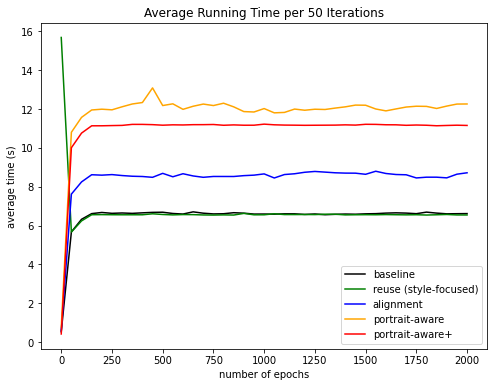

In [7]:
# plot per-50-iterations running time
plt.figure(figsize=[8,6])
plt.plot(range(0, 2001, 50), np.diff(portrait_naive_times[:,:], axis=1).mean(axis=0), color = "black")
plt.plot(range(0, 2001, 50), np.diff(portrait_reuse_style_times[:,:], axis=1).mean(axis=0), color = "green")
plt.plot(range(0, 2001, 50), np.diff(portrait_align_times[:,:], axis=1).mean(axis=0), color = "blue")
plt.plot(range(0, 2001, 50), np.diff(portrait_mask_naive_times[:,:], axis=1).mean(axis=0), color = "orange")
plt.plot(range(0, 2001, 50), np.diff(portrait_mask_best_times[:,:], axis=1).mean(axis=0), color = "red")
plt.legend(labels = ["baseline", "reuse (style-focused)", "alignment",
                     "portrait-aware", "portrait-aware+"],
           loc = "lower right")
plt.xlabel("number of epochs")
plt.ylabel("average time (s)")
plt.title("Average Running Time per 50 Iterations")
plt.draw()
plt.ioff()
plt.show()

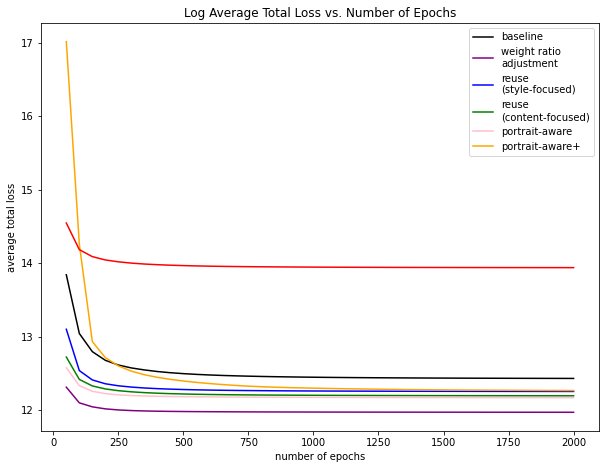

In [8]:
plt.figure(figsize=[10,7.5])
plt.plot(range(50, 2001, 50), np.log(portrait_naive_losses.mean(axis=0)), color = "black")
plt.plot(range(50, 2001, 50), np.log(portrait_weight_losses.mean(axis=0)), color = "purple")
plt.plot(range(50, 2001, 50), np.log(portrait_reuse_style_losses.mean(axis=0)), color = "blue")
plt.plot(range(50, 2001, 50), np.log(portrait_reuse_content_losses.mean(axis=0)), color = "green")
plt.plot(range(50, 2001, 50), np.log(portrait_align_losses.mean(axis=0)), color = "pink")
plt.plot(range(50, 2001, 50), np.log(portrait_mask_naive_losses.mean(axis=0)), color = "orange")
plt.plot(range(50, 2001, 50), np.log(portrait_mask_best_losses.mean(axis=0)), color = "red")
plt.legend(labels = ["baseline", "weight ratio\nadjustment",
                     "reuse\n(style-focused)", "reuse\n(content-focused)", 
                     "portrait-aware", "portrait-aware+"],
           loc = "upper right")
plt.xlabel("number of epochs")
plt.ylabel("average total loss")
plt.title("Log Average Total Loss vs. Number of Epochs")
plt.draw()
plt.ioff()
plt.show()